<a href="https://colab.research.google.com/github/higordevellard/MVP_01/blob/main/mvp_sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Disciplina: Sprint I: Análise de Dados e Boas Práticas
## Aluno: Higor Morais Devellard

In [1]:
# Configuração para não exibir os warnings dos pacotes que serão selecionados
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## Carga do Dataset

Sendo um egenheiro eletricista, estou escolhendo um dataset que detalha o consumo de energia dos Estados Unidos entre os anos de 2001 - 2022. O Estudo será importante para conhecer melhor sobre a matriz energética deste país e o que esperar para os próximos anos.

In [2]:
# Localicazão do dataset

url_1 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte1.csv'
url_2 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte2.csv'

# labels dos atributos do dataset
labels_atributos = ['ID', 'Ano', 'Mês', 'Estado', 'Tipo_de_produção', 'Fonte_de_Energia', 'Geração(MWh)']

# Lê o arquivo 
dataset_p1 = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')
dataset_p2 = pd.read_csv(url_2, names=labels_atributos, header=0, delimiter=',')

A tabela foi importada pelo kaggle no seguinte endereço: https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022 , onde a mesma foi elaborada por dados fornecidos pelo governo norte americano no endereço https://www.eia.gov/electricity/

Devido à limitação do kaggle para carregamento de datasets, foi considerado a divisão do dataset em duas partes.

## Análise Exploratória de Dados

###Informações Gerais e Estatísticas Descritivas

In [3]:
#Usando o método concat para concatenar as duas tabelas carregadas
dataset = pd.concat([dataset_p1, dataset_p2])

In [4]:
# Mostra as dimensões do dataset (Quantidade de linhas, quantidade de colunas)
dataset.shape

(496773, 7)

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496773 entries, 0 to 246773
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                496773 non-null  int64  
 1   Ano               496773 non-null  int64  
 2   Mês               496773 non-null  int64  
 3   Estado            496773 non-null  object 
 4   Tipo_de_produção  496773 non-null  object 
 5   Fonte_de_Energia  496773 non-null  object 
 6   Geração(MWh)      496773 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 30.3+ MB


**Observações importantes levantadas após os resultados da função info():** 

1)Todas as linhas e colunas foram devidamente carregadas.

2)Todas as 496773 linhas são não nulas.

3) as colunas "Mês" e "Ano" estão como tipo inteiro, inicialmente não há necessidade de alteração, mas à frente irei criar uma nova coluna tipo data no formado Mês/Ano.

4) as colunas 3,4 e 5 estão no formato esperado, assim como a coluna 6 que deverá retornar um valor decimal para a geração de energia. 


In [6]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(25)

,ID,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(MWh)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0


**Sobre o Dataset:**

**1.**  O dataset apresenta dados temporais de "Mês" e "Ano" com um range de 01/2001 à 05/2022.

**2.**  Para os atributos da coluna "Estado" temos 52 dados categóricos nominais de 51 estados dos EUA em sua forma abreviada e o atributo "US-TOTAL" que se refere a soma do valor gerado de todos os estados.

**3.**   Os atributos categóricos nominais da coluna "Tipo_de_produção" são:

*   'Electric Generators, Electric Utilities' e 'Electric Generators, Independent Power Producers'

> **Electric generators** (Geradores elétricos) são equipamentos que convertem outras formas de energia, como energia mecânica, térmica ou química, em energia elétrica. Esses geradores são usados em uma variedade de aplicações, desde pequenos geradores portáteis para uso doméstico até grandes usinas de energia que fornecem eletricidade para cidades inteiras.

>**Electric utilities**, são empresas que fornecem eletricidade aos consumidores. Eles são responsáveis pela produção, transmissão e distribuição de energia elétrica para residências, empresas e indústrias. As utilities podem ser públicas, privadas ou uma combinação de ambas. Além disso, elas geralmente têm o monopólio sobre a distribuição de energia em sua área de serviço.

>**Independent Power Producers** (IPPs) são empresas que produzem eletricidade para venda a outras empresas ou ao público em geral. Eles geralmente são empresas privadas que operam em mercados de energia liberalizados e não são controlados por empresas de serviços públicos reguladas pelo governo. Os IPPs podem gerar eletricidade usando uma variedade de fontes. Eles podem vender a energia que produzem diretamente a outras empresas ou ao público em geral, ou podem vender a energia a um intermediário que a revende para outras empresas ou ao público.

* 'Combined Heat and Power, Electric Power', 'Combined Heat and Power, Commercial Power' e 'Combined Heat and Power, Industrial Power'

>Um sistema de Geração **Combined Heat and Power** (CHP), também conhecido como cogeração, gera simultaneamente eletricidade e calor a partir de uma única fonte de combustível. A quantidade de eletricidade e calor produzida pode variar dependendo do sistema específico de CHP e sua aplicação.

No dataset as Combined Heat and Power (CHPs) estão divididas em três categorias:

>**Electric Power** (Energia Elétrica), se refere à eletricidade gerada pelo sistema de CHP que é devolvida à rede elétrica. Pode ser usada por clientes residenciais, comerciais e industriais que estão conectados à rede.

>**Commercial power** (Energia comercial), se refere à eletricidade gerada pelo sistema de CHP que é usada no local por um cliente comercial, como um hotel, hospital ou prédio de escritórios. Essa eletricidade pode alimentar as operações do cliente, como iluminação, computadores e outros equipamentos.

>**Industrial power** (Energia industrial), se refere à eletricidade gerada pelo sistema de CHP que é usada no local por um cliente industrial, como uma planta de manufatura ou refinaria. Essa eletricidade pode alimentar os processos de produção do cliente, como motores, bombas e outros equipamentos.

*   'Total Electric Power Industry'

Atributo que retornará a soma do que foi gerado pelos demais atributos categóricos descritos acima.

**4.**  Os atributos categóricos nominais referentes à coluna **"Fonte_de_energia"** irão indicar qual a matéria prima usada para a geração de energia, podendo ser:

'Coal' (Carvão)

'Petroleum' (Petróleo)

'Natural Gas' (Gás Natural)

'Hydroelectric Conventional' (Hidroelétrica convencional)

'Wind' (Eólica)

'Other Gases' (Outros gases, como por exemplo gas carvão, gás de aterros sanitários)

'Nuclear' (Nuclear)

'Wood and Wood Derived Fuels' (Madeira e combustíveis derivados de madeira)

'Other Biomass' (Demais resíduos agrículas e florestais)

'Solar Thermal and Photovoltaic' (Energia Solar)

'Pumped Storage' (Armazenamento por Bombeamento): Não muito falada, mas é a energia que é armazenada por bombeamento de água de um reservatório inferior para um reservatório superior durante períodos de baixa demanda de energia. Quando a demanda de energia é alta, a água é liberada do reservatório superior para gerar eletricidade em uma turbina.

'Geothermal' (Geotérmica - proveniente do calor da Terra).

'Other' (Outro) - Todos os demais meios de geração de energia existentes estão agrupados nesse atributo, como por exemplo a energia gerada por ondas.

'Total' - Atributo que representa a união de todos as fontes de energia listas.

**5.**   **Geração(MWh)** - Atributos Quantitativos que representam a geração de energia em MWh que significa megawatt-hora, para quem não está familiarizado com o termo, uma unidade de medida de energia elétrica. Um megawatt-hora é igual a um milhão de watts de potência utilizados durante uma hora. É uma medida comum para quantificar a quantidade de energia elétrica que é produzida ou consumida ao longo do tempo. Por exemplo, se uma usina de energia produz 100 megawatts de eletricidade por uma hora, isso seria igual a 100 MWh de energia elétrica produzida. 







In [7]:
# Alterando os valores de geração de energia de Megawatt.hora para Terawatt.hora para melhor visualização dos gráficos.
dataset['Geração(TWh)'] = dataset['Geração(MWh)'] / (10 ** 6)

**Obs:** 

1 kWh = 1.000 Wh

1 MWh = 1.000.000 Wh

1 TWh = 1.000.000.000.000 Wh


In [8]:
# Como o dataset escolhido já vem com o índice, optei por utilizar o comando .drop da biblioteca pandas para ocultar a primeira coluna
dataset_1 = dataset.drop(['ID', 'Geração(MWh)'], axis=1)

In [9]:
dataset_1.head(10)

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh)
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087
5,2001,1,AK,Total Electric Power Industry,Total,0.590145
6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,0.018410
7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,0.064883
8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,0.305277
9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,0.104549


In [10]:
#Criando uma nova coluna concatenando as informações de Mês e Ano
dataset_1['Mês/Ano'] = dataset_1['Mês'].astype(str) + '/' + dataset_1['Ano'].astype(str)

In [11]:
#Formatando a nova coluna como data
dataset_1['Mês/Ano'] = pd.to_datetime(dataset_1['Mês/Ano'], format='%m/%Y')

In [12]:
dataset_1.head()

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh),Mês/Ano
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903,2001-01-01
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085,2001-01-01
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521,2001-01-01
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549,2001-01-01
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087,2001-01-01


**Criação do gráfico de energia total gerada nos EUA (2001-2022) em TWh.**

In [13]:
dataset_2 = dataset_1['Fonte_de_Energia'] == 'Total'

Primeiramente, preciso selecionar apenas as linhas em que a fonte de energia seja igual a "Total", ou seja, esteja somando todos os tipos de fonte energia.

In [14]:
dataset_3 = dataset_1['Estado'] == 'US-TOTAL'

O segundo passo será filtrar apenas os estados 'US-TOTAL' que representa a geração somada dos estados.

In [15]:
dataset_4 = dataset_1[dataset_2 & dataset_3]

In [16]:
#Agrupar as colunas de Mês/ano com o estado para saber o valor gerado de energia.
dataset_5 = dataset_4.groupby(['Mês/Ano', 'Estado'])['Geração(TWh)'].sum().reset_index()

In [17]:
dataset_5.head()

,Mês/Ano,Estado,Geração(TWh)
0,2001-01-01,US-TOTAL,664.986320
1,2001-02-01,US-TOTAL,565.880396
2,2001-03-01,US-TOTAL,601.413088
3,2001-04-01,US-TOTAL,556.157742
4,2001-05-01,US-TOTAL,600.983242


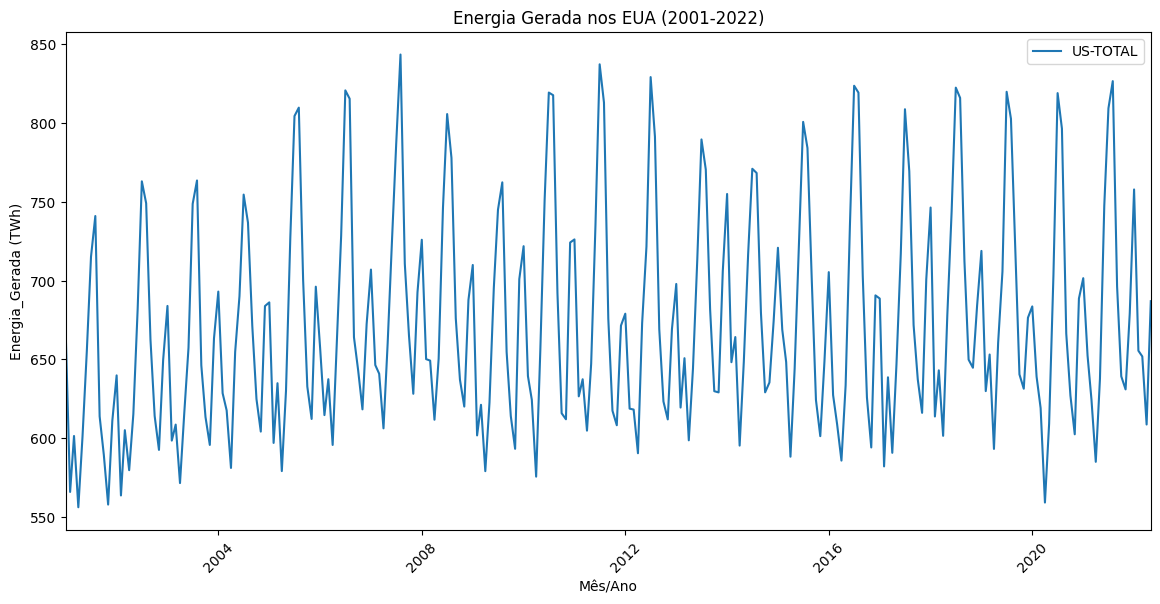

In [18]:
#Definindo a dimensão para a figura que será criada 
fig, ax = plt.subplots(figsize=(14,6))

#O Loop for será usado para percorrer todos os dados
for estado in dataset_5['Estado'].unique():
    df_grafico = dataset_5[dataset_5['Estado'] == estado]
    ax.plot(df_grafico['Mês/Ano'], df_grafico['Geração(TWh)'], label=estado)

# Adicione legendas e títulos
ax.legend()
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Energia_Gerada (TWh)')
ax.set_title('Energia Gerada nos EUA (2001-2022)')

# Define o limite inferior do eixo x como o primeiro valor obtido
x_min = dataset_5['Mês/Ano'].min()
x_max = dataset_5['Mês/Ano'].max()
ax.set_xlim(left=x_min, right=x_max)

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.05)

O gráfico de geração de energia nos EUA ao longo dos anos apresenta pontos interessantes 

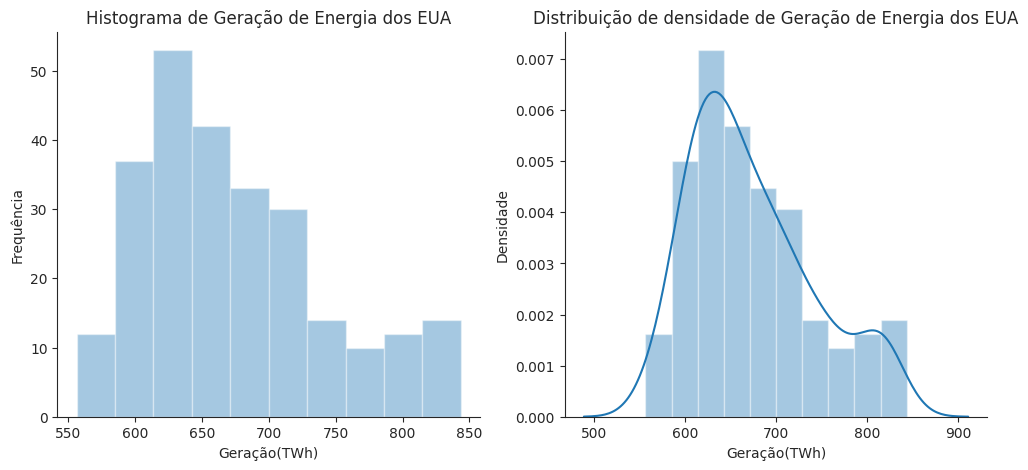

In [76]:
sns.set_style("ticks")

# Criar um subplot com duas colunas
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plotar o primeiro gráfico no primeiro subplot
sns.distplot(dataset_5["Geração(TWh)"], kde=False, bins=10, ax=axs[0])
axs[0].set_xlabel("Geração(TWh)")
axs[0].set_ylabel("Frequência")
axs[0].set_title("Histograma de Geração de Energia dos EUA")

# Plotar o segundo gráfico no segundo subplot
sns.distplot(dataset_5["Geração(TWh)"], kde=True, bins=10, ax=axs[1])
axs[1].set_xlabel("Geração(TWh)")
axs[1].set_ylabel("Densidade")
axs[1].set_title("Distribuição de densidade de Geração de Energia dos EUA")

sns.despine()
plt.show()

In [23]:
#Agrupar as colunas de Mês/ano com o estado para saber o valor gerado de energia.
dataset_6 = dataset_4.groupby(['Ano','Mês', 'Estado'])['Geração(TWh)'].sum().reset_index()

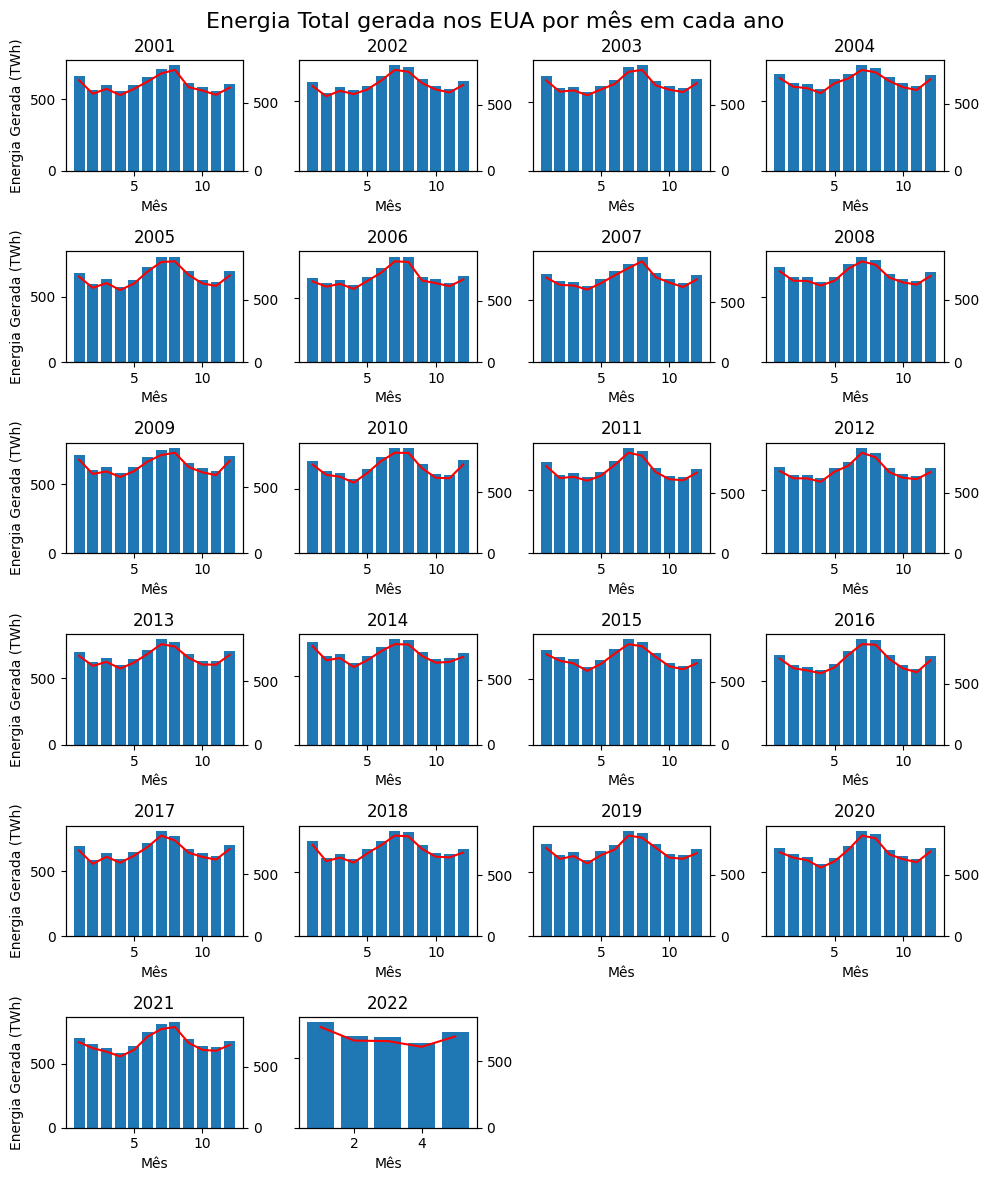

In [55]:
fig = plt.figure(figsize=(10, 12))
fig.suptitle('Energia Total gerada nos EUA por mês em cada ano', fontsize=16)

for i, ano in enumerate(dataset_6['Ano'].unique()):
    dados_ano = dataset_6[dataset_6['Ano'] == ano]
    dados_agrupados = dados_ano.groupby('Mês')['Geração(TWh)'].sum()

    # atualiza o índice do subplot a cada iteração
    ax = fig.add_subplot(6, 4, i+1) 
    ax.bar(dados_agrupados.index, dados_agrupados.values)
    ax.set_title(f'{ano}')
    ax.set_xlabel('Mês')
    
    # Define a legenda somente para os gráficos da primeira coluna
    if i == 0 or i == 4 or i == 8 or i == 12 or i == 16 or i ==20:
        ax.set_ylabel('Energia Gerada (TWh)')
    else:
        ax.set_yticklabels([])
    
    # cria um segundo eixo y e plota a linha
    ax2 = ax.twinx()
    ax2.plot(dados_agrupados.index, dados_agrupados.values, color='red')
    ax2.set_ylim(0, dados_agrupados.values.max() * 1.1) # define limites para o eixo y direito
    
plt.tight_layout()
plt.show()